<a href="https://colab.research.google.com/github/AMROAMRO404/Tweet-Age-prediction/blob/main/tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data preprocessing**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import xml.etree.ElementTree as Xet
import pandas as pd
import numpy as np
import os

# assign directory
directory = "/content/gdrive/MyDrive/Project_Data/pan2015"
# assign csv file path
data_csv = "/content/gdrive/MyDrive/Project_Data/data.csv"

truth = "/content/gdrive/MyDrive/Project_Data/truth.txt"

# cols = ["id", "tweet_text", "gender", "age"]
# rows = []
list_of_documents = []
ordered_ids = []
for i,filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f): # print(f)
      xmlparse = Xet.parse(f)
      root = xmlparse.getroot()
      list_of_documents.append(root.getchildren())
      id = root.attrib['id']
      ordered_ids.append({"id": id})
list_of_documents = np.array(list_of_documents)
ordered_ids = np.array(ordered_ids)
print(list_of_documents)
print(ordered_ids)


In [ ]:
f = open(truth, 'r+')
lines = [line for line in f.readlines()]
f.close()

truth_dict = {}
for i in range(len(lines)):
  curr_id = lines[i][:36]
  truth_dict[curr_id] = lines[i][43:48]
for key, value in truth_dict.items():
    print(key, ' : ', value)

In [ ]:
all_user_text = []
data_dict = {}
for i in range(len(list_of_documents)):
  current_user_texts = []
  for j in range(len(list_of_documents[i])):
    current_user_texts.append(list_of_documents[i][j].text)
  all_user_text.append(current_user_texts)
all_user_text = np.array(all_user_text)
print(all_user_text)


In [ ]:
all_data = []
for i in range(len(ordered_ids)):
  all_data.append({"id":ordered_ids[i]['id'],"class":truth_dict[ordered_ids[i]['id']],"texts":all_user_text[i]})
all_data = np.array(all_data)
print(all_data)

In [ ]:
to_data_frame = [] 
for i in range(len(all_data)):
  texts_user = all_data[i]['texts']
  class_user = all_data[i]['class']
  for j in range(len(texts_user)):
    to_data_frame.append([texts_user[j],class_user])
to_data_frame= np.array(to_data_frame)
print(to_data_frame)


[['Things I want for my business cards but are too expensive: 3 PMS colors. colored edges, soft touch finish, raised spot UV, cut 45°corners.\t\t'
  '25-34']
 ['"painters produced their most highly valued work when they were 41.92 years old"\nhttp://t.co/T8Gvom70GE\n\nSo... I\'ve 15 years left for mine?\t\t'
  '25-34']
 ["@username your new discussion layout is confusing regarding who says what, because the comments aren't sectioned off. http://t.co/Dfkg4js2o2\t\t"
  '25-34']
 ...
 ["@username hahahaha *insert all hate emoji's*\t\t" '18-24']
 ['Just one of those days http://t.co/ejufiYiXMr\t\t' '18-24']
 ['@username heb al red bull bitch\t\t' '18-24']]


In [ ]:
df = pd.DataFrame(to_data_frame).to_csv(data_csv)
df = pd.read_csv(data_csv, names=['tweet', 'class'])
df = df.iloc[1: , :]

# **Data Description**

In [ ]:
# Display dimensions of dataframe
print(type(df))
print(df.shape)
print(df.info())

print("_______________________________________________________________________")
# Display first 10 records
print(df.head(10))

print("_______________________________________________________________________")
# Display last 10 records
print(df.tail(10))

print("_______________________________________________________________________")
# List types of all columns
print(df.dtypes)

print("_______________________________________________________________________")
# List the column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
(14166, 2)
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14166 entries, 0.0 to 14165.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   14166 non-null  object
 1   class   14166 non-null  object
dtypes: object(2)
memory usage: 332.0+ KB
None
_______________________________________________________________________
                                                 tweet  class
0.0  Things I want for my business cards but are to...  25-34
1.0  "painters produced their most highly valued wo...  25-34
2.0  @username your new discussion layout is confus...  25-34
3.0  I never really understood why game environment...  25-34
4.0  @username 20k and 2048² on a gun, fine. But th...  25-34
5.0  @username Guns using the texture already in me...  25-34
6.0  @username I'm talking about chars that are sma...  25-34
7.0  @username Dammit Crendor. You broke Jesse's ga...  25-34
8.0  @username @

SUM : 
 tweet    0
class    0
dtype: int64


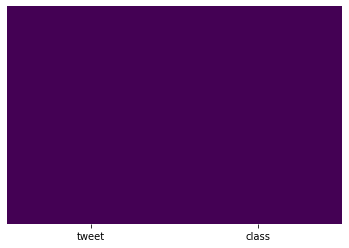

In [ ]:
import seaborn as sns 
# Is there any missing values ?
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [ ]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

df.drop_duplicates(inplace=True)
print("number of duplicate rows : ",df[df.duplicated()].shape)

number of duplicate rows :  (0, 2)
number of duplicate rows :  (0, 2)


In [ ]:
# Mapping of label values
df_copy = df.copy()
print(df.head(10))

print("_______________________________________________________________________")
df_copy["class"] = df_copy["class"].map({"25-34":1,"35-49":2,"50-XX":3,"18-24":0})
print("class :\n",df_copy.head(10))

                                                 tweet  class
0.0  Things I want for my business cards but are to...  25-34
1.0  "painters produced their most highly valued wo...  25-34
2.0  @username your new discussion layout is confus...  25-34
3.0  I never really understood why game environment...  25-34
4.0  @username 20k and 2048² on a gun, fine. But th...  25-34
5.0  @username Guns using the texture already in me...  25-34
6.0  @username I'm talking about chars that are sma...  25-34
7.0  @username Dammit Crendor. You broke Jesse's ga...  25-34
8.0  @username @username I liken Esther to a movie....  25-34
9.0  Gamers unfazed, Sale has arrived!\nThe tiniest...  25-34
_______________________________________________________________________
class :
                                                  tweet  class
0.0  Things I want for my business cards but are to...      1
1.0  "painters produced their most highly valued wo...      1
2.0  @username your new discussion layout is confus

# **Models Implementation**

In [ ]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
y = df_copy["class"].values
# split the dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, 
                        test_size= 0.20, random_state=100, stratify=y)

vec = TfidfVectorizer()
train_vectors = vec.fit_transform(X_train['tweet'])
test_vectors = vec.transform(X_test['tweet'])

print("train data : ", train_vectors.shape)
print("test data : ", test_vectors.shape)

train data :  (11236, 22517)
test data :  (2810, 22517)


Classification report : 
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
               precision    recall  f1-score   support

           0       0.63      0.87      0.73      1110
           1       0.63      0.70      0.66      1113
           2       0.95      0.05      0.09       369
           3       0.00      0.00      0.00       218

    accuracy                           0.63      2810
   macro avg       0.55      0.41      0.37      2810
weighted avg       0.62      0.63      0.56      2810

Confusion matrix: 
 [[971 139   0   0]
 [332 780   1   0]
 [119 232  18   0]
 [125  93   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


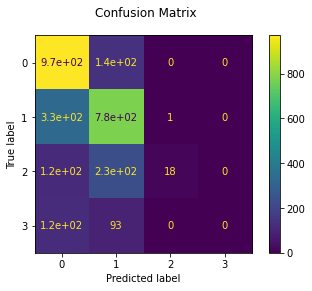

In [ ]:
MNB_clf = MultinomialNB()

# fit model no training data
MNB_clf.fit(train_vectors, y_train)

# making predictions on the testing set 
predicted = MNB_clf.predict(test_vectors)

# Classification report
print("Classification report : \n", MNB_clf,"\n", 
      metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(MNB_clf, test_vectors, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      1110
           1       0.66      0.74      0.70      1113
           2       0.67      0.37      0.48       369
           3       0.62      0.19      0.29       218

    accuracy                           0.67      2810
   macro avg       0.66      0.53      0.55      2810
weighted avg       0.67      0.67      0.66      2810

Confusion matrix: 
 [[890 195  11  14]
 [234 826  48   5]
 [ 71 154 138   6]
 [ 83  84  10  41]]


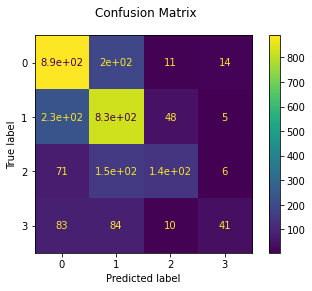

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the classifier
# multi_class: default = "auto"
logreg = LogisticRegression(random_state=42)

# Train the classifier
logreg.fit(train_vectors, y_train)

# Predict the value of X_test
predicted = logreg.predict(test_vectors)

# Classification report
print("Classifier : ", logreg)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(logreg, test_vectors, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

Classification report : 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1110
           1       0.67      0.73      0.70      1113
           2       0.70      0.41      0.51       369
           3       0.66      0.23      0.35       218

    accuracy                           0.68      2810
   macro avg       0.68      0.55      0.58      2810
weighted avg       0.68      0.68      0.67      2810

Confusion matrix: 
 [[900 189   7  14]
 [241 818  47   7]
 [ 76 138 150   5]
 [ 74  83  10  51]]


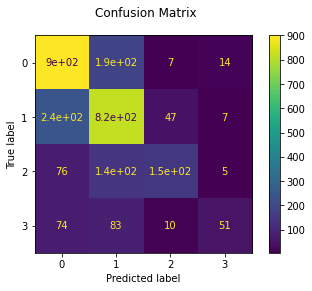

In [ ]:
from sklearn import datasets, svm, metrics

# Create a classifier: a support vector classifier

# classifier = svm.SVC()
classifier = svm.SVC(kernel="linear")
# classifier = svm.SVC(kernel="poly", degree=2, C=3, gamma=0.1)
# classifier = svm.SVC(kernel="sigmoid", C=10, gamma=0.001)
# classifier = svm.SVC(kernel="rbf", C=100, gamma=0.001)

# Train the classifier
classifier.fit(train_vectors, y_train)

predicted = classifier.predict(test_vectors)

# Classification report
print("Classification report : \n", classifier,"\n", 
      metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(classifier,  test_vectors, y_test)
disp.figure_.suptitle("Confusion Matrix")

print("Confusion matrix: \n", disp.confusion_matrix)

Classification report : 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
               precision    recall  f1-score   support

           0       0.60      0.71      0.65      1110
           1       0.59      0.55      0.57      1113
           2       0.42      0.38      0.40       369
           3       0.29      0.18      0.23       218

    accuracy                           0.56      2810
   macro avg       0.47      0.45      0.46      2810
weighted avg       0.55      0.56      0.55      2810

Confusion matrix: 
 [[787 233  54  36]
 [343 607 122  41]
 [ 90 121 139  19]
 [ 86  73  19  40]]


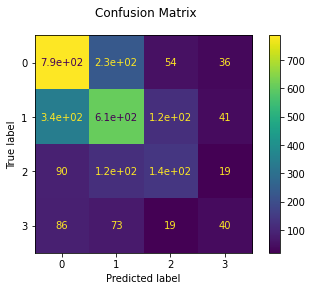

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# training the model on training set
# criterion='gini' splitter='best' 
# max_depth
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)

# making predictions on the testing set 
predicted = tree_clf.predict(test_vectors)

# comparing actual response values (y_test) with predicted response values (predicted)
from sklearn import metrics 
print("Classification report : \n", tree_clf,"\n", metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(tree_clf,  test_vectors, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

# **Validation**

In [ ]:
# Cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
print("\n Stratified K-fold Cross-Validation : *********")
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=100)
model = logreg
results_model = cross_val_score(model, train_vectors, y_train, cv=skfold)
print("Scores    :", results_model)
print("Accuracy  :", results_model.mean())


 Stratified K-fold Cross-Validation : *********


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Scores    : [0.66281139 0.6405694  0.63967972 0.62544484 0.63879004 0.67081851
 0.64559216 0.64737311 0.61531612 0.650935  ]
Accuracy  : 0.6437330263687441


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
